In [1]:
#Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific 
#topics or brands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
twitter_training = pd.read_csv('twitter_training.csv', header=None)
twitter_training

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
# Rename columns for clarity
twitter_training.columns = ['ID', 'Topic', 'Sentiment', 'Text']
twitter_training

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
twitter_training.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [6]:
# Drop any rows with missing values
twitter_training.dropna(inplace=True)
twitter_training.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [7]:
twitter_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73996 non-null  int64 
 1   Topic      73996 non-null  object
 2   Sentiment  73996 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [8]:
# Convert text to lowercase
twitter_training['Cleaned_Text'] = twitter_training['Text'].str.lower()

In [10]:
# Remove special characters and numbers (keep only letters and spaces)
twitter_training['Cleaned_Text'] = twitter_training['Cleaned_Text'].str.replace(r'[^a-z\s]', '', regex=True)

In [11]:
# Display the cleaned text
twitter_training[['Text', 'Cleaned_Text']].head()

,Text,Cleaned_Text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [13]:
# Analyze sentiment distribution
sentiment_distribution = twitter_training['Sentiment'].value_counts()
sentiment_distribution

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Sentiment, dtype: int64

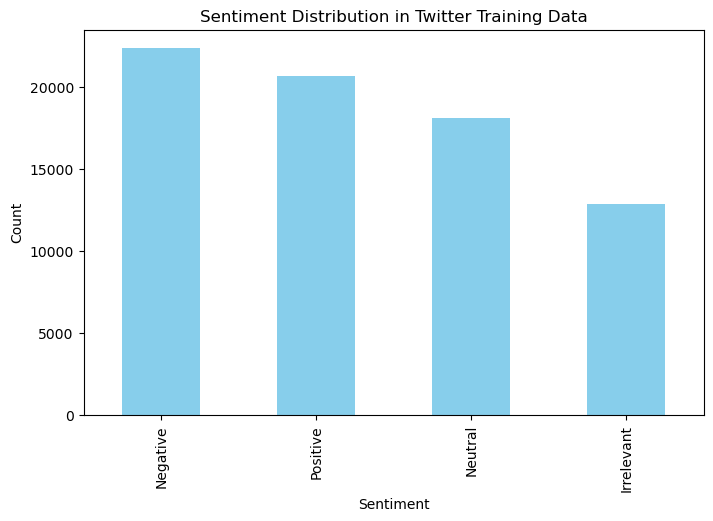

In [14]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution in Twitter Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [15]:
# Split text into words
twitter_training['Words'] = twitter_training['Cleaned_Text'].str.split()

In [16]:
twitter_training

,ID,Topic,Sentiment,Text,Cleaned_Text,Words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m..."
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k..."
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,"[im, getting, on, borderlands, and, i, will, m..."
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...,"[just, realized, that, the, windows, partition..."
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...,"[just, realized, that, my, mac, window, partit..."
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...,"[just, realized, the, windows, partition, of, ..."
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...,"[just, realized, between, the, windows, partit..."


In [18]:
# Explode the words column so that each word becomes a row
words_df = twitter_training.explode('Words')
words_df 

,ID,Topic,Sentiment,Text,Cleaned_Text,Words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,getting
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,on
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,borderlands
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,and
...,...,...,...,...,...,...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,idea
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,how
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,i
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,didnt


In [20]:
# Remove empty strings (if any)
words_df = words_df[words_df['Words'] != '']
words_df 

,ID,Topic,Sentiment,Text,Cleaned_Text,Words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,getting
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,on
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,borderlands
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,and
...,...,...,...,...,...,...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,idea
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,how
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,i
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,just like the windows partition of my mac is l...,didnt


In [21]:
# Analyze most common words by sentiment
positive_words = words_df[words_df['Sentiment'] == 'Positive']['Words'].value_counts().head(10)
negative_words = words_df[words_df['Sentiment'] == 'Negative']['Words'].value_counts().head(10)
neutral_words = words_df[words_df['Sentiment'] == 'Neutral']['Words'].value_counts().head(10)

In [22]:
print("Most common words in positive sentiment:\n", positive_words)
print("\nMost common words in negative sentiment:\n", negative_words)
print("\nMost common words in neutral sentiment:\n", neutral_words)

Most common words in positive sentiment:
 the     11804
i        9115
to       7665
and      6909
a        5935
of       5113
is       4500
for      4379
this     4255
it       4015
Name: Words, dtype: int64

Most common words in negative sentiment:
 the     14017
i       10101
to       9082
and      8630
a        7490
is       6823
of       5746
this     4909
it       4782
in       4781
Name: Words, dtype: int64

Most common words in neutral sentiment:
 the    10630
to      7167
and     6359
a       5969
i       5560
of      4939
for     3997
in      3993
is      3362
on      3215
Name: Words, dtype: int64


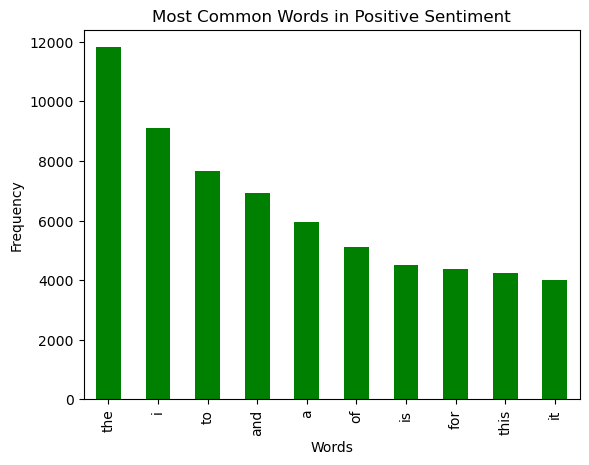

In [23]:
# Plot the most common positive words
positive_words.plot(kind='bar', color='green', title='Most Common Words in Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

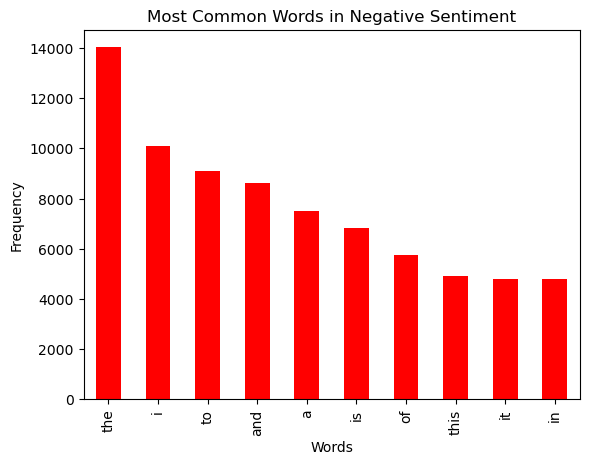

In [24]:
# Plot the most common negative words
negative_words.plot(kind='bar', color='red', title='Most Common Words in Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

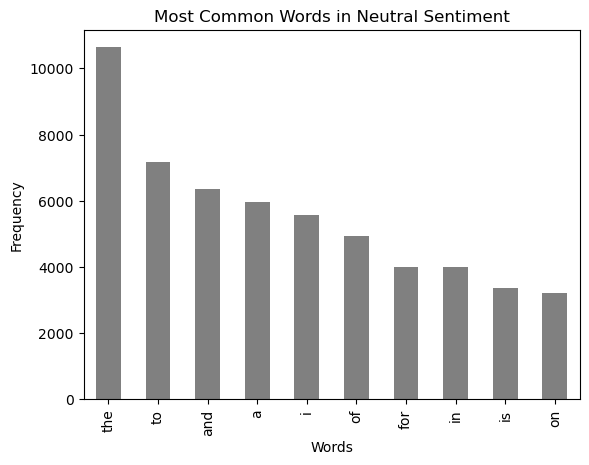

In [25]:
# Plot the most common neutral words
neutral_words.plot(kind='bar', color='gray', title='Most Common Words in Neutral Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Group by topic and sentiment to see how sentiments are distributed across topics
topic_sentiment_distribution = twitter_training.groupby(['Topic', 'Sentiment']).size().unstack().fillna(0)
topic_sentiment_distribution

Sentiment,Irrelevant,Negative,Neutral,Positive
Topic,,,,
Amazon,186,575,1207,308
ApexLegends,192,591,936,634
AssassinsCreed,264,375,156,1439
Battlefield,915,464,351,586
Borderlands,240,426,597,1017
CS-GO,632,344,548,760
CallOfDuty,672,883,375,446
CallOfDutyBlackopsColdWar,569,566,352,856
Cyberpunk2077,465,385,462,950


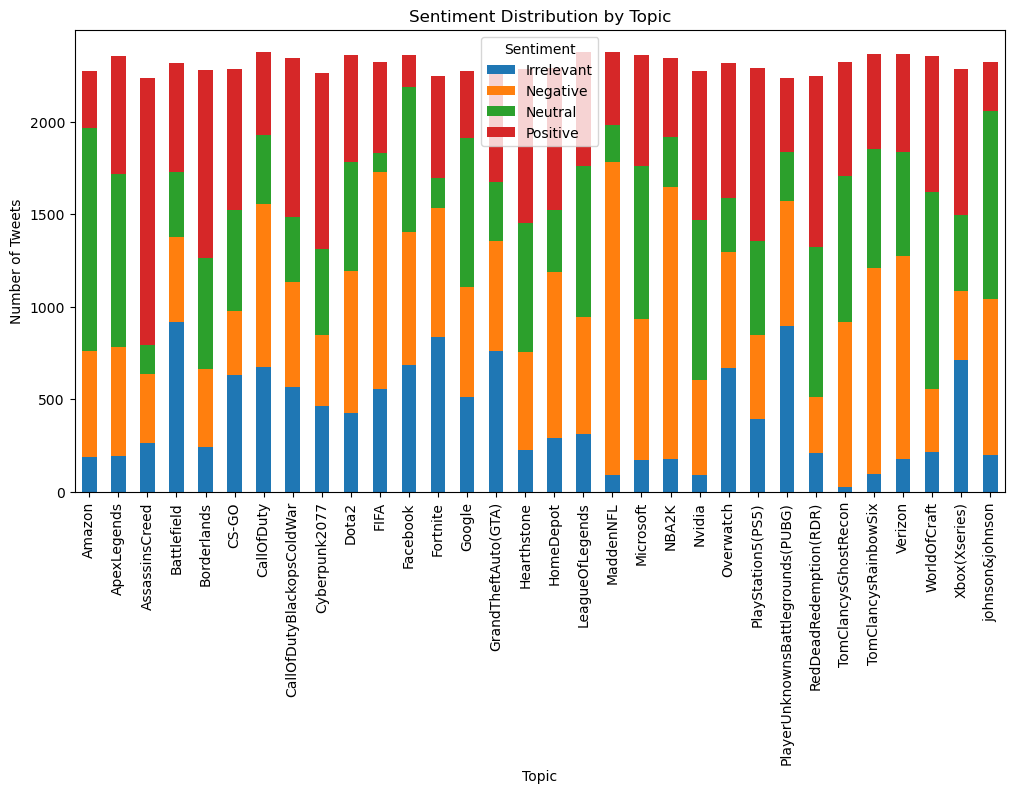

In [28]:
# Plot the distribution
topic_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.show()

In [29]:
#Based on the sentiment analysis,
#AssassinsCreed and Borderlands stand out with the highest positive sentiments, indicating strong user approval. 
#Conversely, MaddenNFL and NBA2K show significant negative sentiment, suggesting areas of user dissatisfaction. 
#Fortnite and Battlefield have a notable amount of irrelevant sentiment, possibly indicating off-topic discussions. 
#Microsoft and Google have a balanced distribution with higher neutral sentiment, reflecting a more mixed user perspective.
#These insights suggest that while some brands enjoy positive sentiment, others may need to address negative perceptions 
#to improve public opinion.